# Trabajo Práctico 4 - Machine Learning
*Felicitas marolda*

## Parte 1: Clustering de datos
Para el dataset clustering.csv realizar los siguientes análisis:

a) Implementar el algoritmo K-means y determinar la cantidad de clusters con el método de
“ganancias decrecientes” (graficar L vs. K, y elegir un valor K donde al aumentar K deje
de reducir significativamente L, donde L es la suma de las distancias). Graficar el conjunto
de datos xi mostrando a qué cluster pertenece cada dato (usando colores/marcadores
distintos para cada cluster) y también mostrar el centroide de cada cluster.

In [105]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt

import src.algoritmos as alg
import src.auxiliares as aux
import src.preprocessing as pp

In [106]:
np.random.seed(241204)

In [107]:
# cargamos datasets
clustering_csv = pd.read_csv('data/clustering.csv')

# drop primera columna
clustering_csv = clustering_csv.drop(clustering_csv.columns[0], axis=1)

# min max scaling
clustering_csv = pp.min_max(clustering_csv)


          A         B
0  0.816105  0.644565
1  0.875655  0.608406
2  0.931723  0.606556
3  0.846996  0.640054
4  0.849459  0.597697
5  0.821232  0.620785
6  0.873245  0.632648
7  0.884623  0.640627
8  0.807800  0.643711
9  0.833640  0.562978


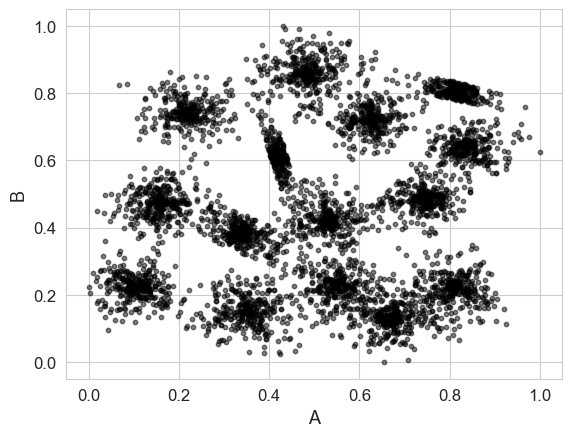

In [108]:
# primeras 10 filas
print(clustering_csv.head(10))

# graficamos
fs = 13
plt.scatter(clustering_csv['A'], clustering_csv['B'], s=10, c='black', alpha=0.5)
plt.xlabel('A', fontsize=fs)
plt.ylabel('B', fontsize=fs)
plt.show()

In [109]:
# pasamos a numpy
clustering = clustering_csv.values

In [110]:
importlib.reload(alg)
importlib.reload(aux)

k_values = range(1,30)

distances_k = []
k_info = {}
for k in k_values:
    centroids, labels = alg.k_means(clustering, k)
    distances = aux.get_distances_sum(clustering, labels, centroids)
    k_info[k] = {
        'centroids': centroids,
        'labels': labels,
        'distances': distances
    }
    distances_k.append(distances)

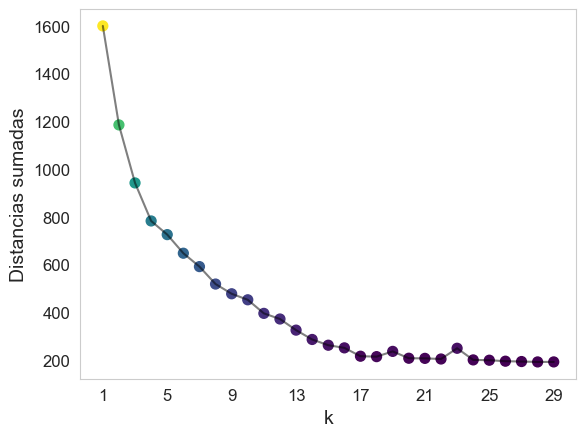

In [111]:
importlib.reload(aux)
aux.graph(k_values, distances_k, 'k', 'Distancias sumadas')

Vemos como se ven las proyecciones en 5, 12 y 17

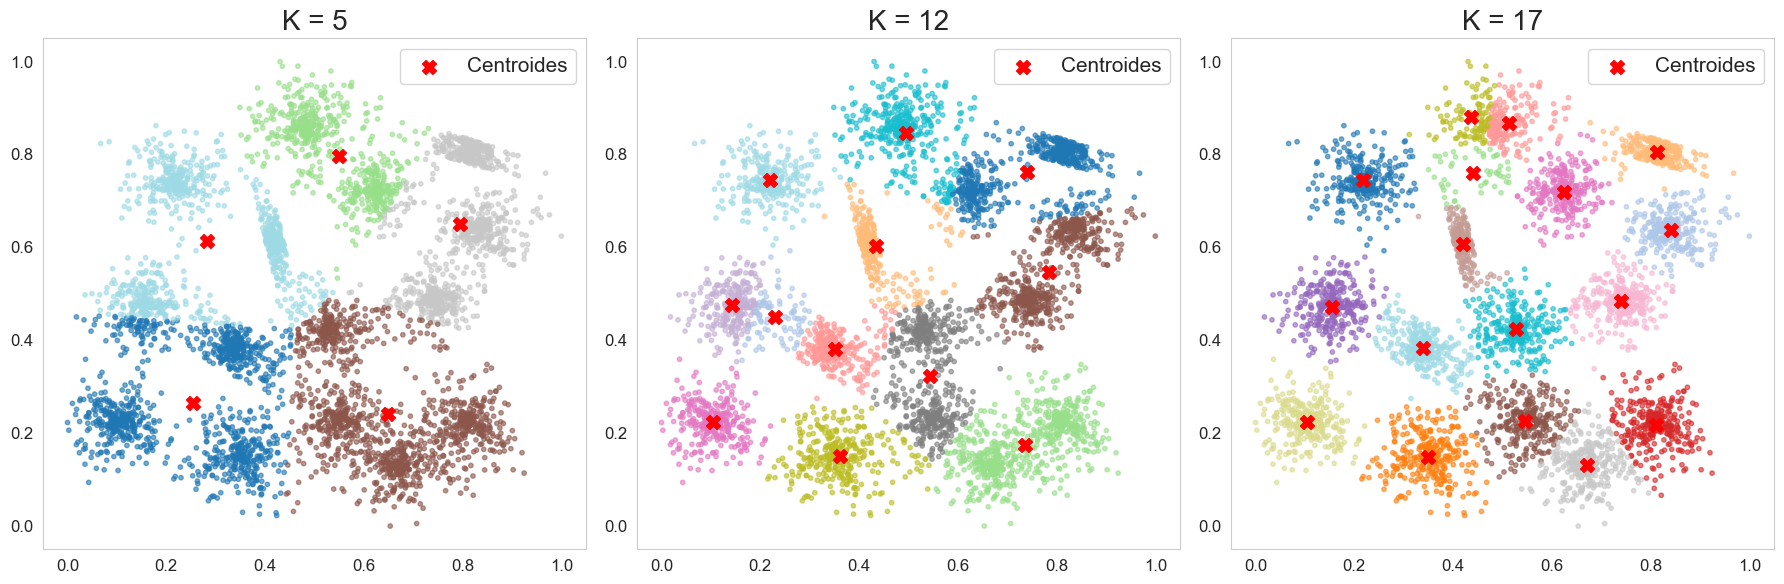

In [112]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

fs = 15

for idx, k in enumerate([5, 12, 17]):
    labels_k = k_info[k]['labels']
    centroids_k = k_info[k]['centroids']
    axs[idx].scatter(clustering[:, 0], clustering[:, 1], c=labels_k, cmap='tab20', s=10, alpha=0.6)
    axs[idx].scatter(centroids_k[:, 0], centroids_k[:, 1], c='red', marker='X', s=100, label='Centroides')
    axs[idx].set_title(f'K = {k}', fontsize=20)
    axs[idx].legend(fontsize=fs)
    axs[idx].grid()

plt.tight_layout()
plt.show()

b) Implementar el algoritmo Gaussian Mixture Model (GMM) y realizar la misma tarea que
en el inciso anterior. Recuerde que puede inicializar la optimización de GMM con una
corrida de K-means.

In [113]:
importlib.reload(alg)
importlib.reload(aux)

k_possible = range(1,20,2)
distances_k_gmm = []
k_info_gmm = {}
for k in k_possible:
    print(f'k = {k}')
    medias, covs, weights, responsabilidades, log_like_hist, labels_gmm = alg.GMM(
        clustering,
        k=k,
        centroids_init=k_info[k]['centroids'],
    )
    distances = aux.get_distances_sum(clustering, labels_gmm, medias)
    k_info_gmm[k] = {
        'centroids': medias,
        'covs': covs,
        'weights': weights,
        'responsabilidades': responsabilidades,
        'log_like_hist': log_like_hist,
        'labels_gmm': labels_gmm
    }
    distances_k_gmm.append(distances)

k = 1
k = 3
k = 5
k = 7
k = 9
k = 11
k = 13
k = 15
k = 17
k = 19


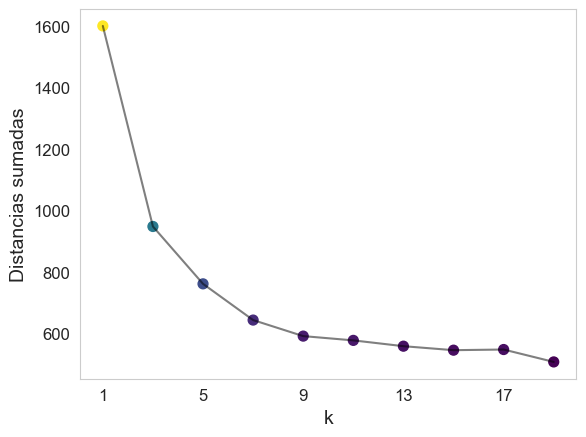

In [114]:
importlib.reload(aux)
aux.graph(k_possible, distances_k_gmm, 'k', 'Distancias sumadas')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


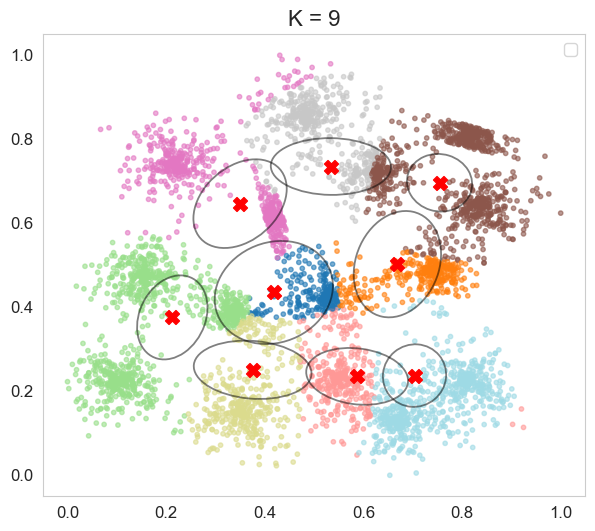

In [115]:
importlib.reload(aux)
k = 9
centroids = k_info_gmm[k]['centroids']
covs = k_info_gmm[k]['covs']
weights = k_info_gmm[k]['weights']
responsabilidades = k_info_gmm[k]['responsabilidades']
log_like_hist = k_info_gmm[k]['log_like_hist']
labels_gmm = k_info_gmm[k]['labels_gmm']

fig,ax = plt.subplots(1, 1, figsize=(7, 6))
ax.scatter(clustering[:, 0], clustering[:, 1], c=labels_gmm, cmap='tab20', s=10, alpha=0.6)
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)
for i in range(len(centroids)):
    aux.plot_ellipse_transformed(centroids[i], covs[i], ax=ax, scale=0.6)
    # aux.plot_ellipse_transformed(centroids[i], covs[i], ax=ax)
ax.set_title(f'K = {k}')
ax.legend()
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


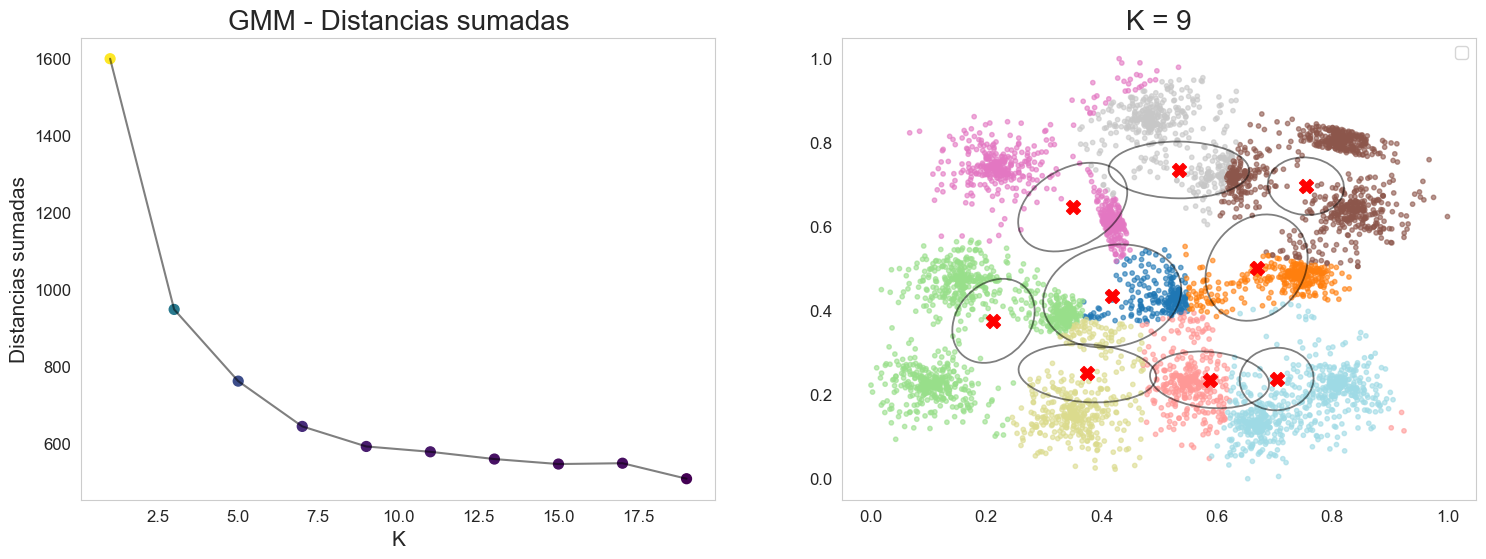

In [116]:
# graficamos juntos
importlib.reload(aux)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))
axs[0].scatter(k_possible, distances_k_gmm, c=distances_k_gmm, s=50, cmap='viridis')
axs[0].plot(k_possible, distances_k_gmm, color='black', alpha=0.5)
axs[0].set_xlabel('K', fontsize=15)
axs[0].set_ylabel('Distancias sumadas', fontsize=15)
axs[0].set_title('GMM - Distancias sumadas', fontsize=20)
axs[0].grid()

axs[1].scatter(clustering[:, 0], clustering[:, 1], c=labels_gmm, cmap='tab20', s=10, alpha=0.6)
axs[1].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)
for i in range(len(centroids)):
    aux.plot_ellipse_transformed(centroids[i], covs[i], ax=axs[1], scale=0.6)
    # aux.plot_ellipse_transformed(centroids[i], covs[i], ax=ax)
axs[1].set_title(f'K = {k}', fontsize=20)
axs[1].legend()

plt.grid()
plt.show()


c) Implementar el algoritmo DBSCAN y aplicarlo al conjunto de datos. Explorar el efecto
de variar los parámetros ϵ (radio de la vecindad) y K (mínimo número de puntos en
una zona densa). Luego, elegir una combinación razonable de ϵ y K y graficar los datos
mostrando a qué cluster pertenece cada uno, utilizando colores/marcadores distintos para
cada cluster/ruido.

In [117]:
importlib.reload(alg)
importlib.reload(aux)

combinations = [[0.01, 1], [0.1, 2], [0.1, 10], [0.2, 3], [0.3, 4], [0.3, 9], [0.4, 5], [0.5, 6], [0.5, 2], [0.8, 7]]

# grid search
distances_db = []
info_db = {}
for comb in combinations:
    eps, k = comb
    print(f'eps = {eps}, k = {k}')
    labels_db, joining_db = alg.DBSCAN(clustering, eps=eps, k=k)
    centroids_db = aux.get_centroids(clustering, labels_db)
    distances = aux.get_distances_sum(clustering, labels_db, centroids_db)
    print(" "*10, f'distances = {distances}')
    distances_db.append(distances)
    info_db[(eps, k)] = {
        'labels': labels_db,
        'joining': joining_db,
        'distances': distances
    }

eps = 0.01, k = 1
           distances = 98.21547648321587
eps = 0.1, k = 2
           distances = 1599.943493034772
eps = 0.1, k = 10
           distances = 1599.943493034772
eps = 0.2, k = 3
           distances = 1599.943493034772
eps = 0.3, k = 4
           distances = 1599.943493034772
eps = 0.3, k = 9
           distances = 1599.943493034772
eps = 0.4, k = 5
           distances = 1599.943493034772
eps = 0.5, k = 6
           distances = 1599.943493034772
eps = 0.5, k = 2
           distances = 1599.943493034772
eps = 0.8, k = 7
           distances = 1599.943493034772


las distancias dejan de tener sentido porque hay ruido que no se toma en cuenta.

In [118]:
importlib.reload(alg)
params_a = [0.01, 10]
print(f'eps = {params_a[0]}, k = {params_a[1]}')
labels_db_a, to_join_points_a = alg.DBSCAN(clustering, eps=params_a[0], k=params_a[1])

params_b = [0.025, 11]
print(f'eps = {params_b[0]}, k = {params_b[1]}')
labels_db_b, to_join_points_b = alg.DBSCAN(clustering, eps=params_b[0], k=params_b[1])

params_c = [0.03, 15]
print(f'eps = {params_c[0]}, k = {params_c[1]}')
labels_db_c, to_join_points_c = alg.DBSCAN(clustering, eps=params_c[0], k=params_c[1])

params_d = [0.04, 10]
print(f'eps = {params_d[0]}, k = {params_d[1]}')
labels_db_d, to_join_points_d = alg.DBSCAN(clustering, eps=params_d[0], k=params_d[1])


eps = 0.01, k = 10
eps = 0.025, k = 11
eps = 0.03, k = 15
eps = 0.04, k = 10


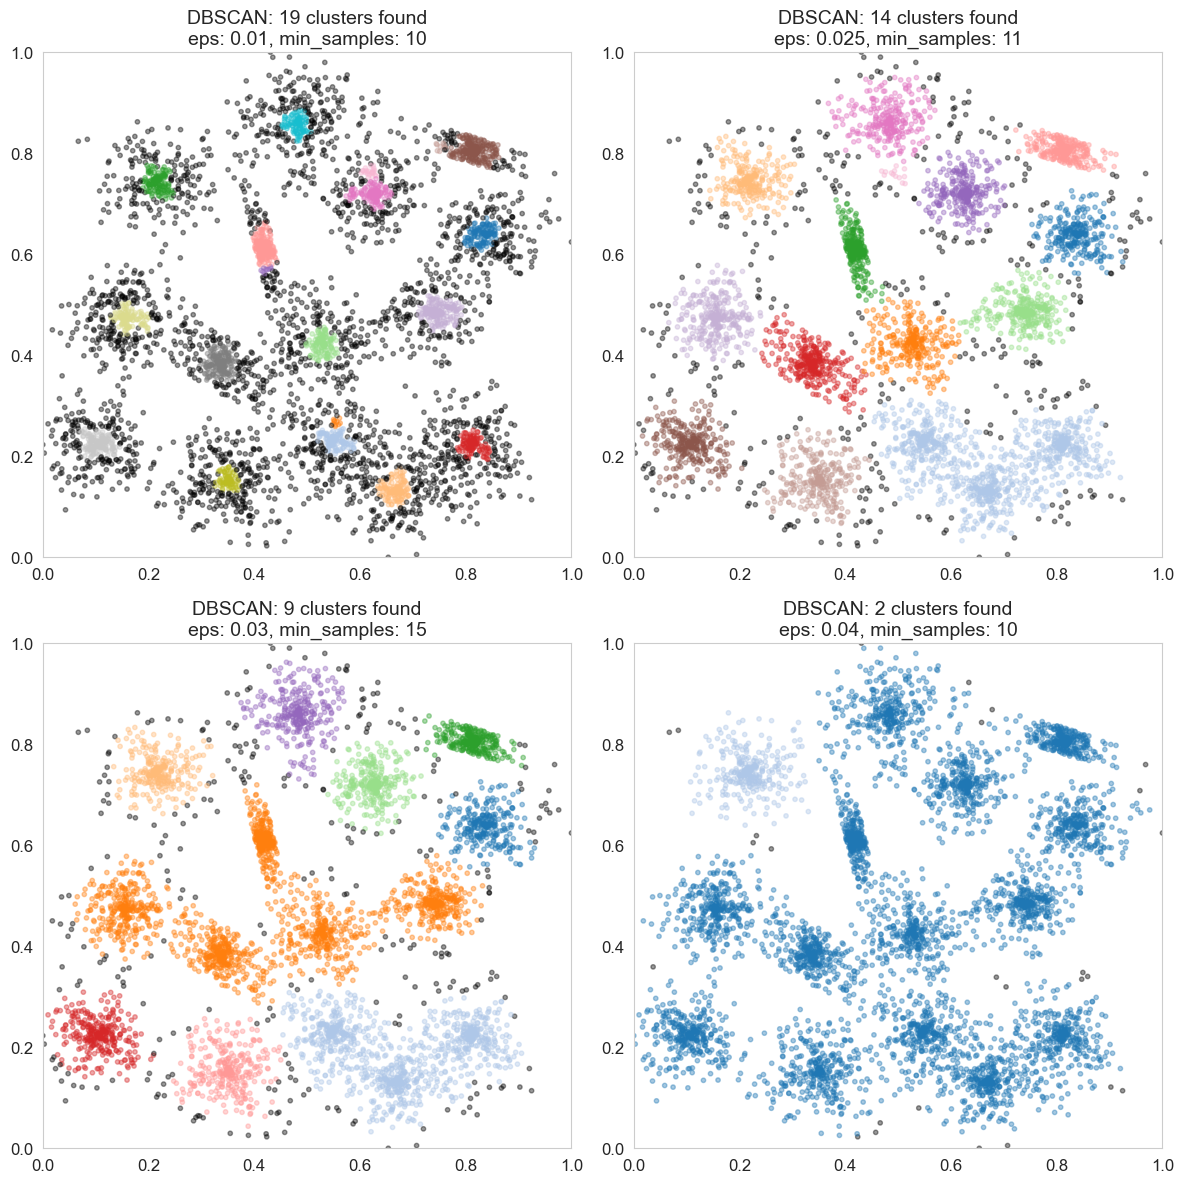

In [119]:
importlib.reload(aux)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
aux.sub_plot(clustering, axs, 0, 0, labels_db_a, params_a)
aux.sub_plot(clustering, axs, 0, 1, labels_db_b, params_b)
aux.sub_plot(clustering, axs, 1, 0, labels_db_c, params_c)
aux.sub_plot(clustering, axs, 1, 1, labels_db_d, params_d)
plt.tight_layout()
plt.show()

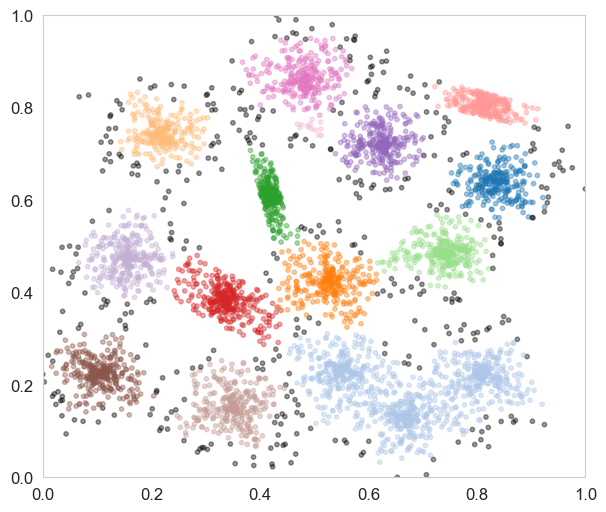

In [120]:
eps = 0.025
min_samples = 11
labels = labels_db_b

importlib.reload(aux)

fif, ax = plt.subplots(1, 1, figsize=(7, 6))
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
# Create color array - convert all to RGBA format
cmap = plt.cm.tab20
colors = []
for label in labels:
    if label == -1:  # Noise points
        colors.append(np.array([0, 0, 0, 1]))  # Black in RGBA
    else:
        colors.append(cmap(label % 20))  # Cluster points

# Convert to numpy array
colors = np.array(colors)

# Create plot
ax.scatter(
    clustering[:, 0], clustering[:, 1], 
    c=colors,
    s=10, 
    alpha=0.4
)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid()
plt.show()

Graficamos las 3 finales juntas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


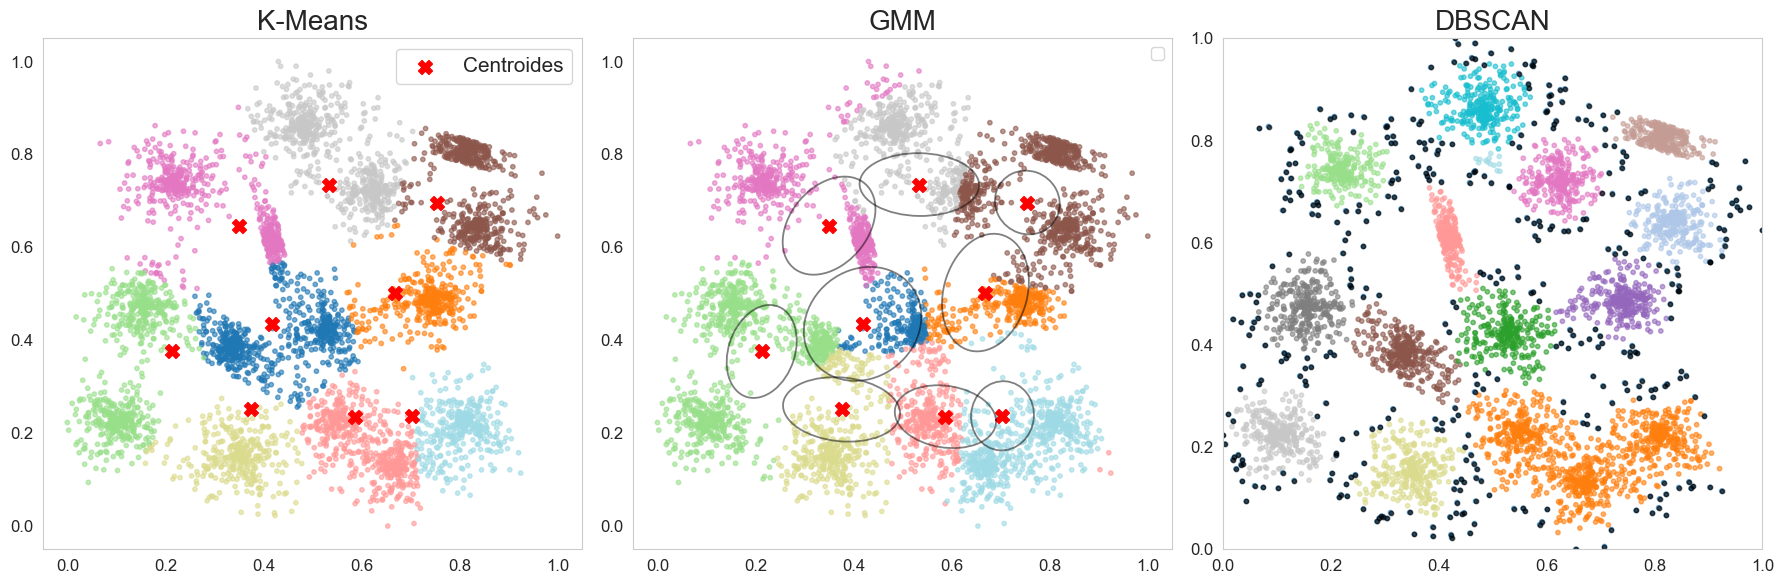

In [121]:
importlib.reload(aux)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
labels_k = k_info[9]['labels']
centroids_k = k_info[9]['centroids']
axs[0].scatter(clustering[:, 0], clustering[:, 1], c=labels_k, cmap='tab20', s=10, alpha=0.6)
axs[0].scatter(centroids_k[:, 0], centroids_k[:, 1], c='red', marker='X', s=100, label='Centroides')
axs[0].set_title(f'K-Means', fontsize=20)
axs[0].legend(fontsize=fs)
axs[0].grid()

axs[1].scatter(clustering[:, 0], clustering[:, 1], c=labels_gmm, cmap='tab20', s=10, alpha=0.6)
axs[1].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)
for i in range(len(centroids)):
    aux.plot_ellipse_transformed(centroids[i], covs[i], ax=axs[1], scale=0.6)
axs[1].set_title(f'GMM', fontsize=20)
axs[1].legend()
axs[1].grid()

# Create a color array where noise points (-1) are black
colors = labels_db_b.copy()
colors = colors.astype(float)  # Convert to float to handle special values

# Create the scatter plot
scatter = axs[2].scatter(clustering[:, 0], clustering[:, 1], 
                        c=colors, cmap='tab20', s=10, alpha=0.6)

# Overlay noise points in black
noise_mask = labels_db_b == -1
if noise_mask.any():
    axs[2].scatter(clustering[noise_mask, 0], clustering[noise_mask, 1], 
                   c='black', s=10, alpha=0.6)

axs[2].set_title(f'DBSCAN', fontsize=20)
axs[2].grid()
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)



plt.tight_layout()
plt.show()

# Problema 2: Reducción de dimensionalidad

Este problema se basará en el dataset MNIST_dataset.csv,
que contiene representaciones tabulares de imágenes de dígitos del 0 al 9. Originalmente, cada
imagen tiene una resolución de 28x28 píxeles en escala de grises. En este conjunto de datos,
cada imagen se representa como una fila de 784 (28x28) valores, donde cada valor representa
la intensidad de gris de un píxel en la imagen.

In [138]:
mnist_csv = pd.read_csv('data/MNIST_dataset.csv')

# eliminar la primera columna (etiquetas)
# mnist = mnist[:, 1:]
mnist = mnist_csv.drop('label', axis=1).values

# normalizamos
mnist_normalized = mnist/ 255.0

a) Implementar Principal Component Analysis (PCA) y aplicarlo al conjunto de datos.
Graficar cómo varía el error cuadrático medio de reconstrucción sobre el conjunto de
datos en función de la cantidad de componentes principales utilizadas.

(70000, 784)


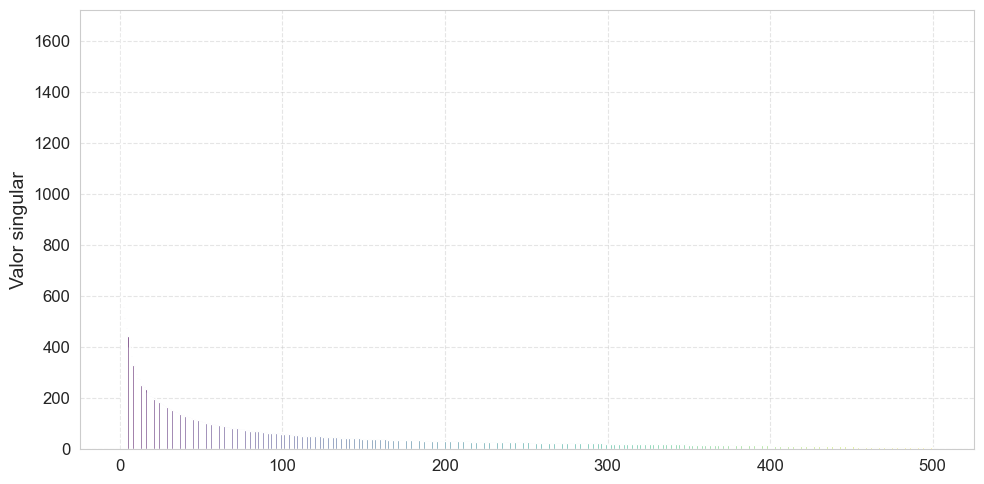

In [148]:
importlib.reload(aux)
print(mnist_normalized.shape)
avas = aux.graficar_valores_singulares(mnist_normalized, components=500)

In [ ]:
importlib.reload(alg)

n_components_range = range(1, 500, 5)
reconstruction_errors = []

for n in n_components_range:
    pca = alg.PCA(n_components=n)
    pca.fit(mnist_normalized)
    error = pca.reconstruction_error(mnist_normalized)
    reconstruction_errors.append(error)
    print(f"Componentes: {n}, Error: {error:.4f}")

Componentes: 1, Error: 0.0607
Componentes: 6, Error: 0.0420
Componentes: 11, Error: 0.0330
Componentes: 16, Error: 0.0272
Componentes: 21, Error: 0.0232
Componentes: 26, Error: 0.0201
Componentes: 31, Error: 0.0176
Componentes: 36, Error: 0.0156
Componentes: 41, Error: 0.0140
Componentes: 46, Error: 0.0127
Componentes: 51, Error: 0.0115
Componentes: 56, Error: 0.0106
Componentes: 61, Error: 0.0097
Componentes: 66, Error: 0.0090
Componentes: 71, Error: 0.0083
Componentes: 76, Error: 0.0077
Componentes: 81, Error: 0.0072
Componentes: 86, Error: 0.0068
Componentes: 91, Error: 0.0064
Componentes: 96, Error: 0.0060
Componentes: 101, Error: 0.0057
Componentes: 106, Error: 0.0053
Componentes: 111, Error: 0.0051
Componentes: 116, Error: 0.0048
Componentes: 121, Error: 0.0046
Componentes: 126, Error: 0.0043
Componentes: 131, Error: 0.0041
Componentes: 136, Error: 0.0039
Componentes: 141, Error: 0.0038
Componentes: 146, Error: 0.0036
Componentes: 151, Error: 0.0034
Componentes: 156, Error: 0.003

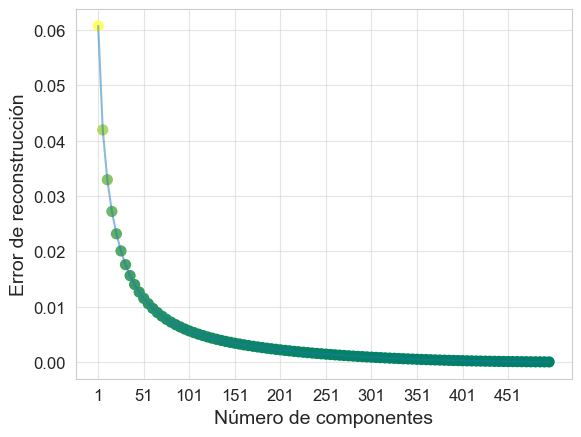

In [141]:
import matplotlib.pyplot as plt
importlib.reload(aux)
aux.graph(n_components_range, reconstruction_errors, 'Número de componentes', 'Error de reconstrucción',step=50, color='summer')

In [142]:
# varianza acumulada
importlib.reload(aux)
importlib.reload(alg)

pca = alg.PCA(n_components=500)
pca.fit(mnist_normalized)
explained_variance = pca.explained_variance_ratio
cumulative_variance = np.cumsum(explained_variance)


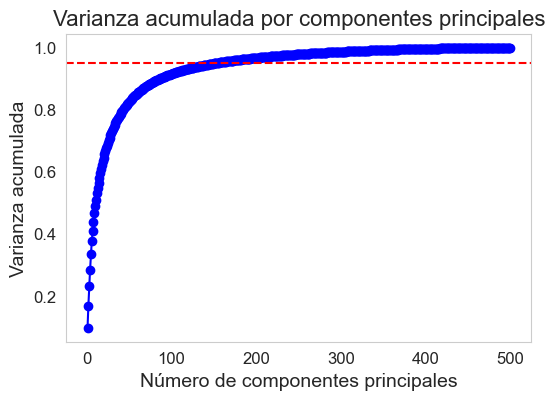

In [143]:
# Gráfico var acumulada
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(range(1, 501), cumulative_variance, marker='o', linestyle='-', color='blue')
# linea en 95%
ax.axhline(y=0.95, color='red', linestyle='--', label='95% Varianza')
ax.set_title('Varianza acumulada por componentes principales', fontsize=16)
ax.set_xlabel('Número de componentes principales', fontsize=14)
ax.set_ylabel('Varianza acumulada', fontsize=14)
ax.grid()

plt.show()

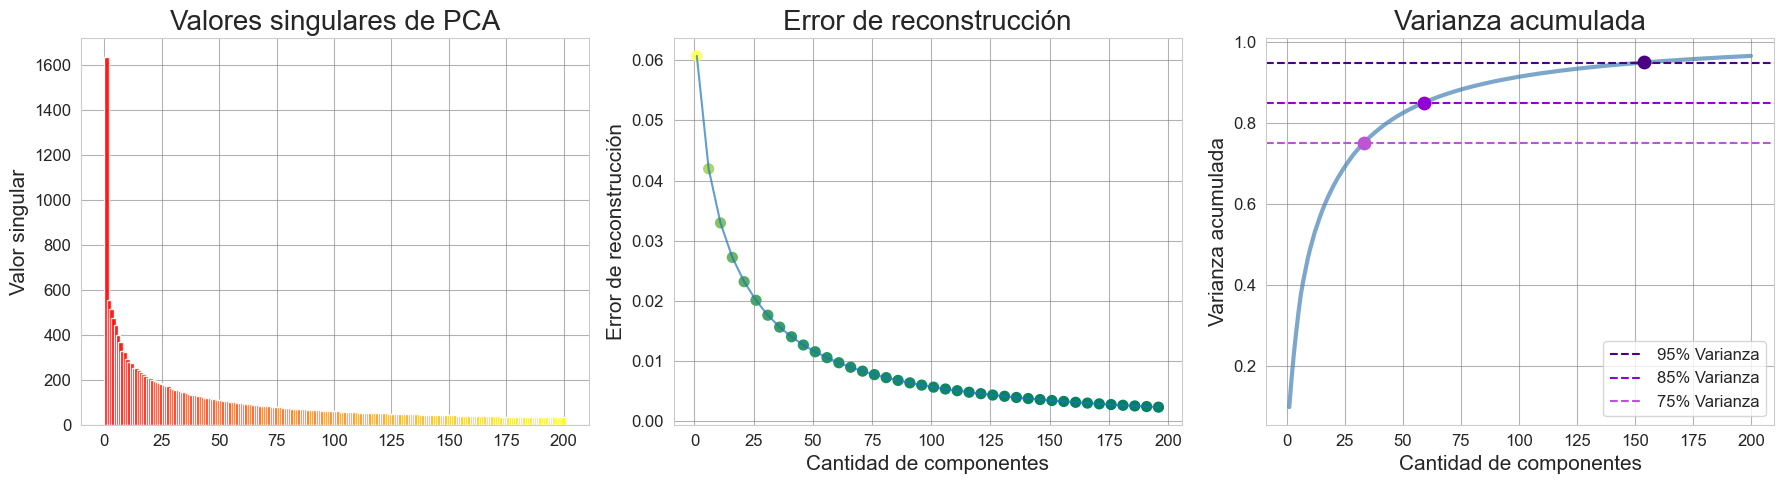

In [144]:
# graficos juntos de menos componentes
importlib.reload(aux)
componentes = 200
n_components_range_ = range(1, componentes + 1, 5)  # Desde 1 hasta 50 componentes, en pasos de 5
paso = 5
reconstruction_errors_comp = reconstruction_errors[:len(n_components_range_)]

cumulative_variance_sampled = cumulative_variance[:componentes]  # Tomamos cada 'paso' de la varianza acumulada

U, S, VT = np.linalg.svd(mnist_normalized, full_matrices=False)
S_comp = S[:componentes]
 
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# histograma
cmap = plt.get_cmap('autumn')
colors_h = [cmap(i / len(S_comp)) for i in range(len(S_comp))]
axs[0].bar(range(1, len(S_comp) + 1), S_comp, color=colors_h, alpha=0.9, width=2)
axs[0].set_ylabel('Valor singular', fontsize=15)
axs[0].set_title('Valores singulares de PCA', fontsize=20)
# axs[0].grid()
axs[0].grid(True, color='gray', alpha=0.6)


# error de reconstrucción
# Usar viridis para el scatter y línea en el gráfico de error de reconstrucción
axs[1].scatter(n_components_range_, reconstruction_errors_comp, c=reconstruction_errors_comp, s=50, cmap='summer')
axs[1].plot(n_components_range_, reconstruction_errors_comp, color='tab:blue', alpha=0.7)
axs[1].set_xlabel('Cantidad de componentes', fontsize=15)
axs[1].set_ylabel('Error de reconstrucción', fontsize=15)
axs[1].set_title('Error de reconstrucción', fontsize=20)
# axs[1].grid()
axs[1].grid(True, color='gray', alpha=0.6)


# varianza acumulada
axs[2].plot(
    range(1, componentes + 1),
    cumulative_variance_sampled,
    color='steelblue',
    alpha=0.7,
    linewidth=3
)
axs[2].set_xlabel('Cantidad de componentes', fontsize=15)
axs[2].set_ylabel('Varianza acumulada', fontsize=15)
axs[2].set_title('Varianza acumulada', fontsize=20)
# Líneas de referencia
axs[2].axhline(y=0.95, color='indigo', linestyle='--', label='95% Varianza')
axs[2].axhline(y=0.85, color='darkviolet', linestyle='--', label='85% Varianza')
axs[2].axhline(y=0.75, color='mediumorchid', linestyle='--', label='75% Varianza')

# Intersecciones y etiquetas
for thresh, color in zip([0.75, 0.85, 0.95], ['mediumorchid', 'darkviolet', 'indigo']):
    idx = np.argmax(cumulative_variance_sampled >= thresh)
    axs[2].scatter(idx+1, cumulative_variance_sampled[idx], color=color, s=80, zorder=5)
    # axs[2].text(idx+1, cumulative_variance_sampled[idx]+0.01, f'{idx+1}', color=color, fontsize=13, ha='center')

axs[2].legend()
# axs[2].grid()
axs[2].grid(True, color='gray', alpha=0.6)

plt.tight_layout()
plt.show()


Seleccionar la cantidad de componentes principales que considere adecuada y justifique
la elección. Usando dicha cantidad de componentes, graficar las imagenes de los digitos
originales y reconstruidos para las primeras 10 muestras del dataset.

In [146]:
importlib.reload(alg)
# primeras 10 imágenes del dataset
mnist_normalized_10 = mnist_normalized[:10, :]

reconstructed_images = []

components = 75

pca = alg.PCA(n_components=components)
pca.fit(mnist_normalized)

reconstructed_images = pca.inverse_transform(pca.transform(mnist_normalized_10))

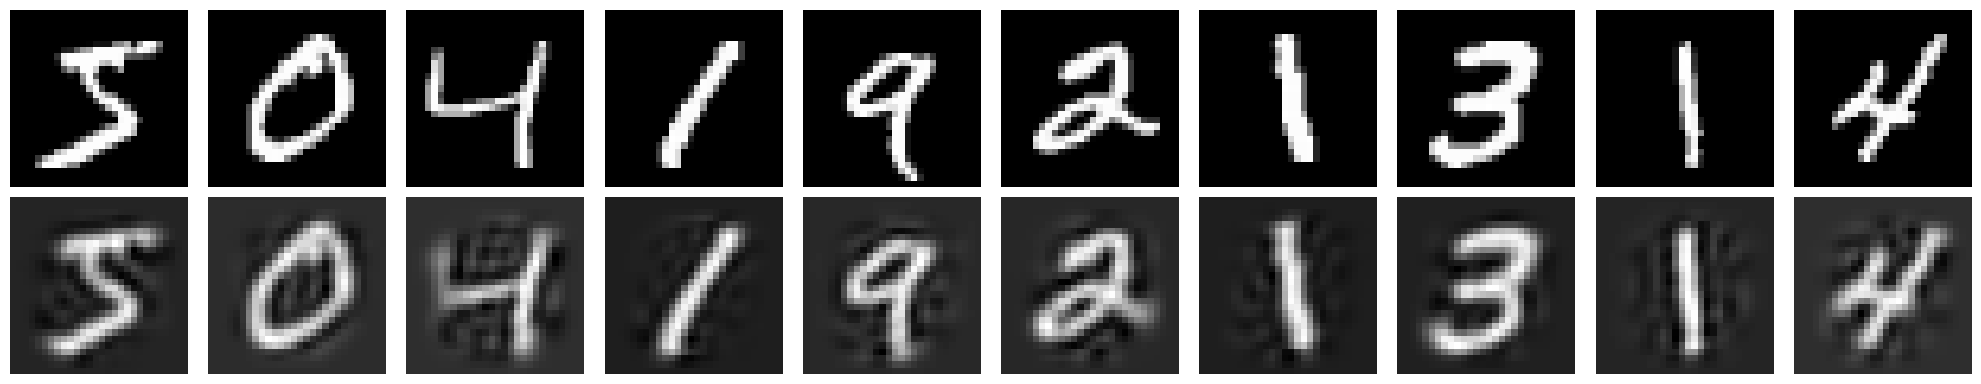

In [147]:
fig, axs = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    axs[0, i].imshow(mnist_normalized_10[i].reshape(28, 28), cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    axs[1, i].axis('off')
axs[0, 0].set_ylabel('Originales', fontsize=15)
axs[1, 0].set_ylabel(f'Reconstruidas\n({components} componentes)', fontsize=15)
plt.tight_layout()
plt.show()